In [4]:

import acquire
import prep

# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

### Acquire

In [5]:
# acquire data
data = acquire.epi_category('711238')

In [6]:
series_id_list, series_name_list = acquire.data_manipulation(data)

['TOTAL.FFPRBUS.M', 'TOTAL.FFTCBUS.M', 'TOTAL.NUETBUS.M', 'TOTAL.REPRBUS.M', 'TOTAL.RETCBUS.M', 'TOTAL.TEAJBUS.M', 'TOTAL.TEEXBUS.M', 'TOTAL.TEIMBUS.M', 'TOTAL.TENIBUS.M', 'TOTAL.TEPRBUS.M', 'TOTAL.TETCBUS.M']
['Total Fossil Fuels Production, Monthly', 'Total Fossil Fuels Consumption, Monthly', 'Nuclear Electric Power Consumption/Production, Monthly', 'Total Renewable Energy Production, Monthly', 'Total Renewable Energy Consumption, Monthly', 'Primary Energy Stock Change and Other, Monthly', 'Total Primary Energy Exports, Monthly', 'Total Primary Energy Imports, Monthly', 'Total Primary Energy Net Imports, Monthly', 'Total Primary Energy Production, Monthly', 'Total Primary Energy Consumption, Monthly']


In [7]:
df_list = acquire.build_df_list_rename(series_id_list, series_name_list)

### prep

In [8]:
df = prep.prep_data(df_list)

In [9]:
df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,nuclear_electric_power_consumptionproduction_monthly,total_renewable_energy_production_monthly,total_renewable_energy_consumption_monthly,primary_energy_stock_change_and_other_monthly,total_primary_energy_exports_monthly,total_primary_energy_imports_monthly,total_primary_energy_net_imports_monthly,total_primary_energy_production_monthly,total_primary_energy_consumption_monthly
date,,,,,,,,,,,
1973-01-01,4932.632,6747.651,68.103,403.981,403.981,771.858,125.781,1173.080,1047.299,5404.715,7223.873
1973-02-01,4729.582,6163.095,64.634,360.900,360.900,390.129,120.883,1168.005,1047.122,5155.115,6592.366
1973-03-01,4946.902,6044.647,72.494,400.161,400.161,-67.640,139.950,1309.473,1169.523,5419.556,6521.439
1973-04-01,4716.271,5493.184,64.070,380.470,380.470,-110.067,194.185,1085.169,890.984,5160.812,5941.729
1973-05-01,4956.995,5613.551,62.111,392.141,392.141,-305.335,196.775,1162.804,966.029,5411.246,6071.940
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,6360.590,6065.796,673.595,970.036,960.758,-195.710,1926.767,1827.771,-98.997,8004.221,7709.515
2021-10-01,6726.426,6075.225,594.842,1010.785,1001.577,-274.187,2125.190,1748.696,-376.494,8332.054,7681.373
2021-11-01,6630.764,6450.370,655.479,1043.517,1020.650,201.897,2174.256,1773.062,-401.194,8329.761,8130.464


In [10]:
df = prep.feat_eng(df)

#### explore

In [11]:
df = prep.fossil_fuels(df)

In [12]:
df.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1973-01-01,4932.632,6747.651,-1815.019
1973-02-01,4729.582,6163.095,-1433.513
1973-03-01,4946.902,6044.647,-1097.745
1973-04-01,4716.271,5493.184,-776.913
1973-05-01,4956.995,5613.551,-656.556


In [13]:
# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

print('Date Range:', df.index.min(), 'to', df.index.max())
df.head()

df.shape[0]

Date Range: 1973-01-01 00:00:00 to 2022-01-01 00:00:00


589

In [14]:
df.total_fossil_fuels_production_monthly.describe()

count     589.000000
mean     5003.713764
std       566.214609
min      3676.065000
25%      4680.978000
50%      4824.607000
75%      5062.813000
max      7060.196000
Name: total_fossil_fuels_production_monthly, dtype: float64

seasonality: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality
trend: long term upwards or downwards movement
cycle: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

Train-Test Split

Ideally all splits contain a season
Human-based: use the last year as test
Percentage based: use the last 20% as test
Cross Validate: break data up into slices and use successive slices as train and test repeatedly (sklearn.model_selection.TimeSeriesSplit)

In [15]:
# # Percentage-Based
# train_size = .70
# n = df.shape[0]
# test_start_index = round(train_size * n)

# train = df[:test_start_index] # everything up (not including) to the test_start_index
# test = df[test_start_index:] # everything from the test_start_index to the end

# plt.plot(train.index, train.total_fossil_fuels_production_monthly)
# plt.plot(test.index, test.total_fossil_fuels_production_monthly)

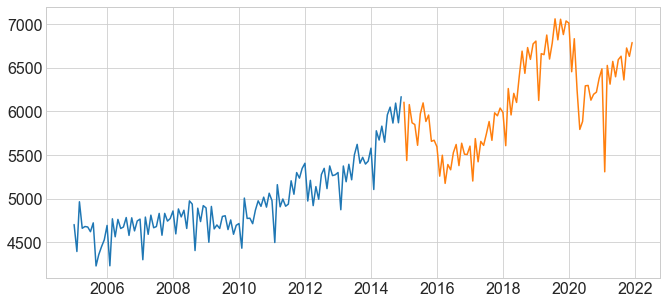

In [16]:
# Human-Based
train = df.loc['2005':'2014'] # includes 2010
test = df.loc['2015':'2021']

plt.plot(train.index, train.total_fossil_fuels_production_monthly)
plt.plot(test.index, test.total_fossil_fuels_production_monthly)

Visualization

In [17]:
y = train.total_fossil_fuels_production_monthly
x = train.total_fossil_fuels_consumption_monthly
z = train.fossil_fuels_difference
y.head()

date
2005-01-01    4703.669
2005-02-01    4395.181
2005-03-01    4964.711
2005-04-01    4661.086
2005-05-01    4681.531
Name: total_fossil_fuels_production_monthly, dtype: float64

<AxesSubplot:ylabel='Frequency'>

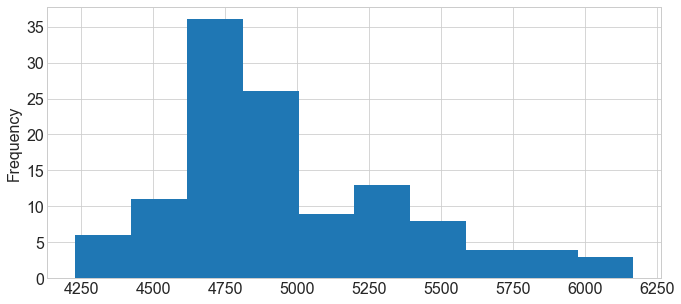

In [18]:
y.plot.hist()

<AxesSubplot:ylabel='Frequency'>

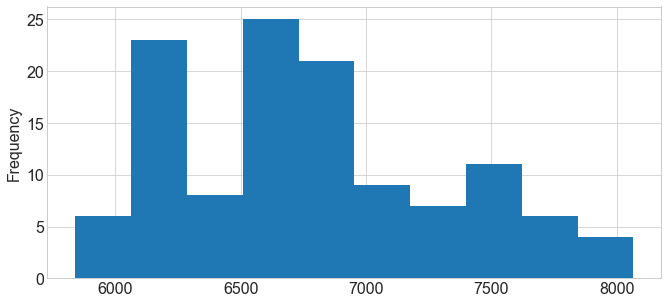

In [19]:
x.plot.hist()

<AxesSubplot:ylabel='Frequency'>

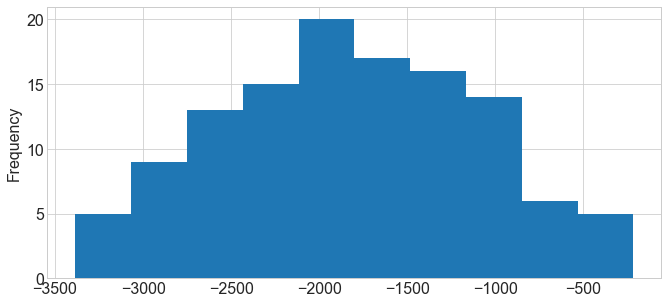

In [20]:
z.plot.hist()

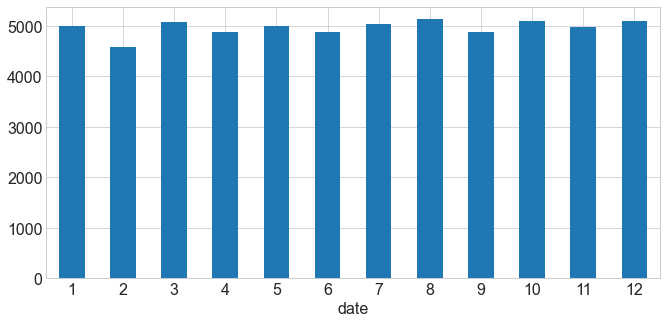

In [21]:
ax = train.groupby(train.index.month).total_fossil_fuels_production_monthly.mean().plot.bar()
ax.tick_params('x', rotation=0)

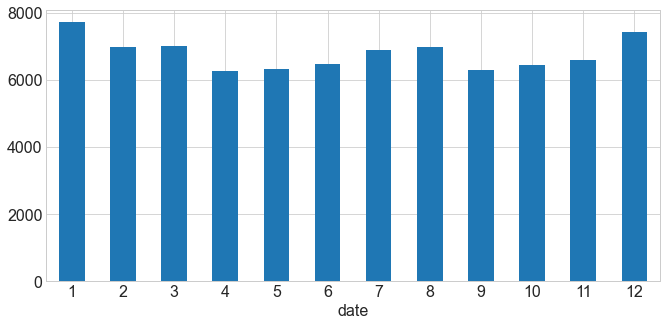

In [22]:
ax = train.groupby(train.index.month).total_fossil_fuels_consumption_monthly.mean().plot.bar()
ax.tick_params('x', rotation=0)

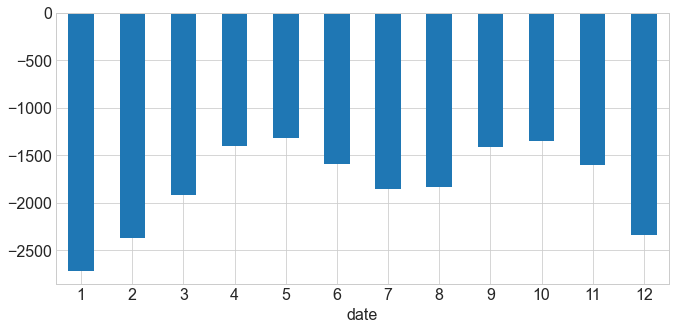

In [23]:
ax = train.groupby(train.index.month).fossil_fuels_difference.mean().plot.bar()
ax.tick_params('x', rotation=0)

In [24]:
train['month'] = train.index.month_name()

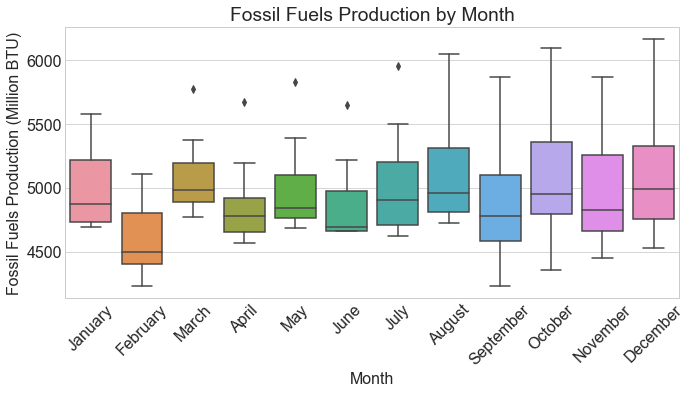

In [66]:
sns.boxplot(data=train, y='total_fossil_fuels_production_monthly', x='month')
# rotate x-axis labels
plt.xticks(rotation=45)
# add labels
plt.xlabel('Month')
plt.ylabel('Fossil Fuels Production (Million BTU)')
plt.title('Fossil Fuels Production by Month')
plt.show()

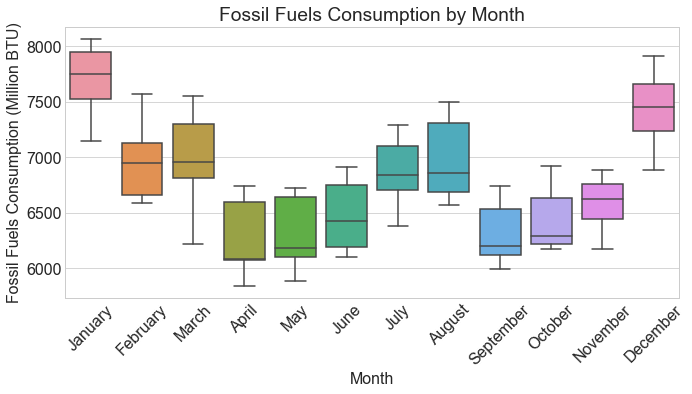

In [65]:
sns.boxplot(data=train, y='total_fossil_fuels_consumption_monthly', x='month')
# rotate x-axis labels
plt.xticks(rotation=45)
# add labels
plt.xlabel('Month')
plt.ylabel('Fossil Fuels Consumption (Million BTU)')
plt.title('Fossil Fuels Consumption by Month')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

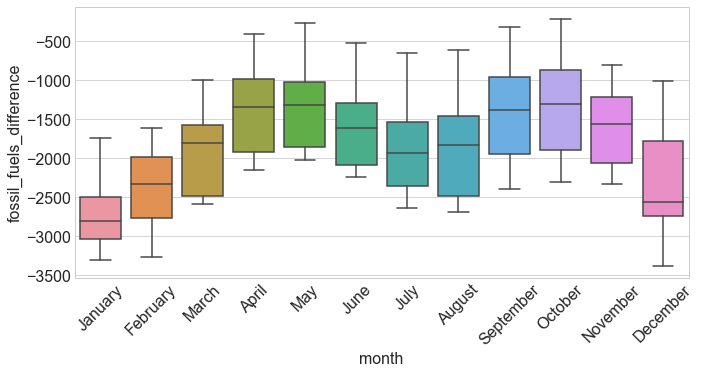

In [27]:
sns.boxplot(data=train, y='fossil_fuels_difference', x='month')
# rotate x-axis labels
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Fossil Fuels Production')

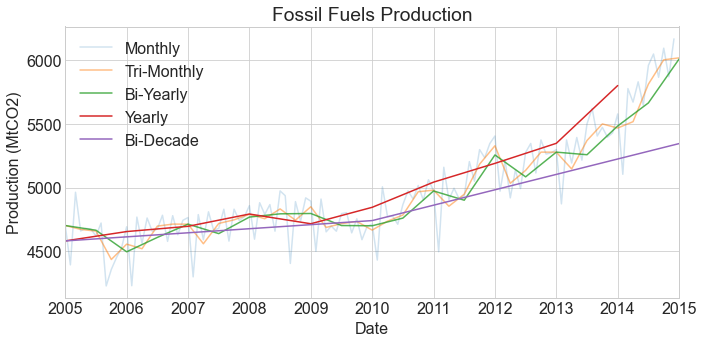

In [28]:
y.plot(alpha=.2, label='Monthly')
y.resample('3M').mean().plot(alpha=.5, label='Tri-Monthly')
y.resample('6M').mean().plot(alpha=.8, label='Bi-Yearly')
y.resample('Y').mean().plot(label='Yearly')
y.resample('5Y').mean().plot(label='Bi-Decade')
plt.legend()
# add labels
plt.xlabel('Date')
plt.ylabel('Production (MtCO2)')
plt.title('Fossil Fuels Production')

Text(0.5, 1.0, 'Fossil Fuels Consumption')

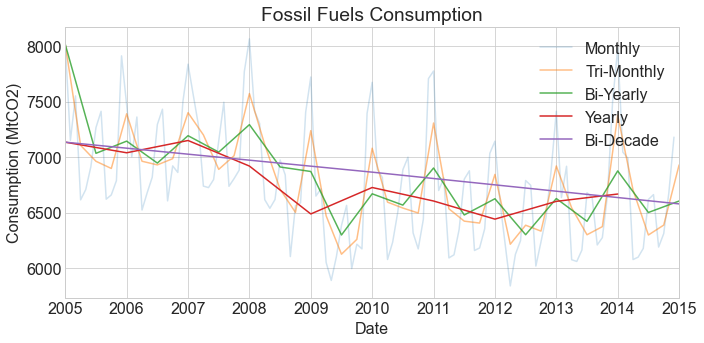

In [29]:
x.plot(alpha=.2, label='Monthly')
x.resample('3M').mean().plot(alpha=.5, label='Tri-Monthly')
x.resample('6M').mean().plot(alpha=.8, label='Bi-Yearly')
x.resample('Y').mean().plot(label='Yearly')
x.resample('5Y').mean().plot(label='Bi-Decade')
plt.legend()
# add labels
plt.xlabel('Date')
plt.ylabel('Consumption (MtCO2)')
plt.title('Fossil Fuels Consumption')

Text(0.5, 1.0, 'Fossil Fuels Difference in Production and Consumption')

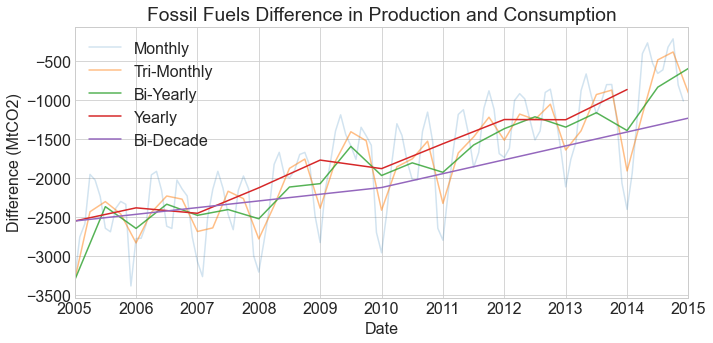

In [30]:
z.plot(alpha=.2, label='Monthly')
z.resample('3M').mean().plot(alpha=.5, label='Tri-Monthly')
z.resample('6M').mean().plot(alpha=.8, label='Bi-Yearly')
z.resample('Y').mean().plot(label='Yearly')
z.resample('5Y').mean().plot(label='Bi-Decade')
plt.legend()
# add labels
plt.xlabel('Date')
plt.ylabel('Difference (MtCO2)')
plt.title('Fossil Fuels Difference in Production and Consumption')

Change in difference over time

[Text(0.5, 1.0, 'Fossil Fuel Production over time')]

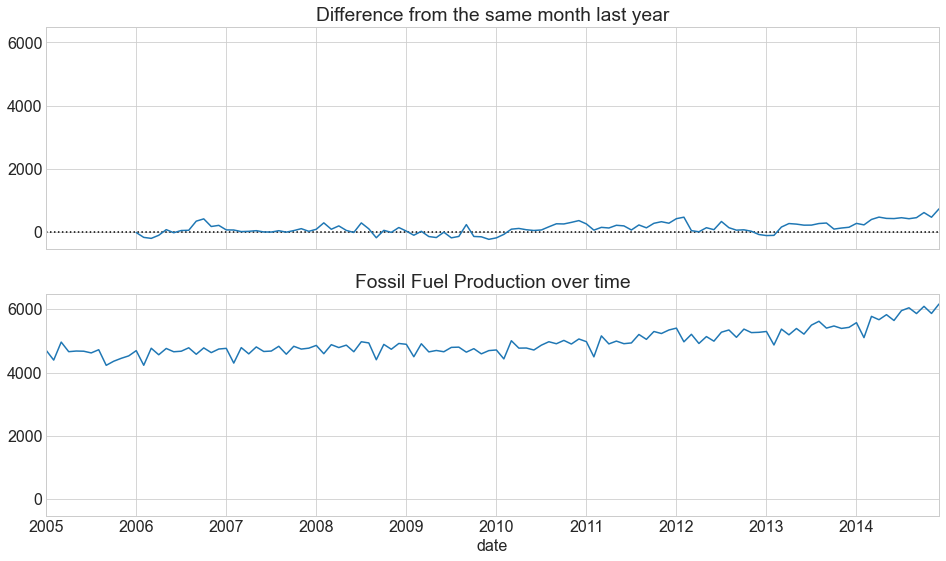

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(16, 9))

ax = y.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black', ls=':')
ax1.set(title='Difference from the same month last year')

y.resample('M').mean().plot(ax=ax2)
ax2.set(title='Fossil Fuel Production over time')

[Text(0.5, 1.0, 'Fossil Fuel Consumption over time')]

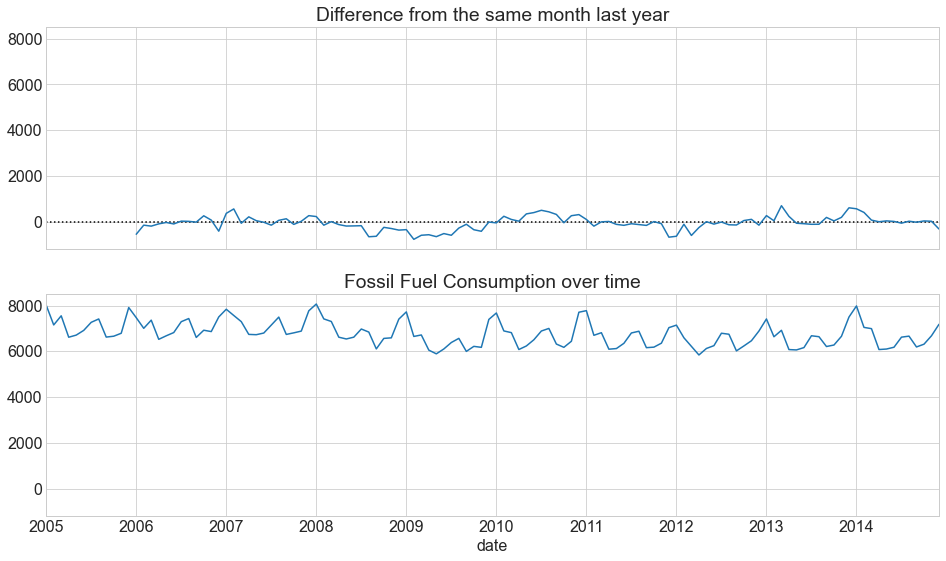

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(16, 9))

ax = x.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black', ls=':')
ax1.set(title='Difference from the same month last year')

x.resample('M').mean().plot(ax=ax2)
ax2.set(title='Fossil Fuel Consumption over time')

[Text(0.5, 1.0, 'Difference in consuption/production over time')]

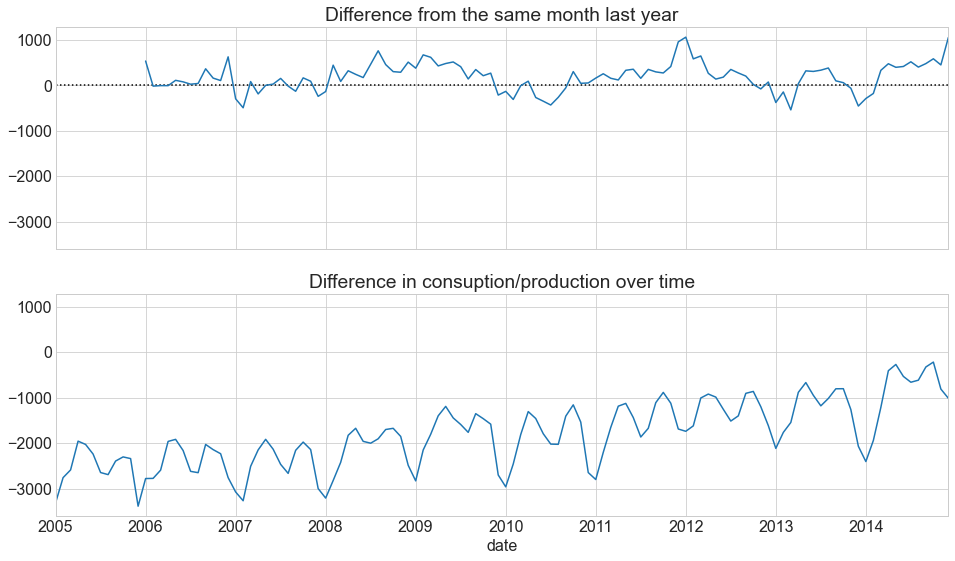

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(16, 9))

ax = z.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black', ls=':')
ax1.set(title='Difference from the same month last year')

z.resample('M').mean().plot(ax=ax2)
ax2.set(title='Difference in consuption/production over time')

Seasonal Plot

xaxis: month
yaxis: y
color: year

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='date'>

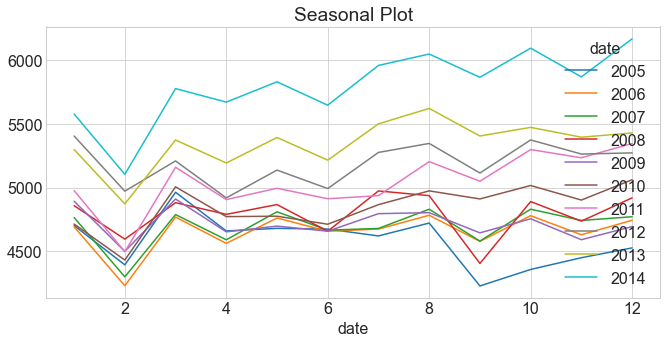

In [34]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='date'>

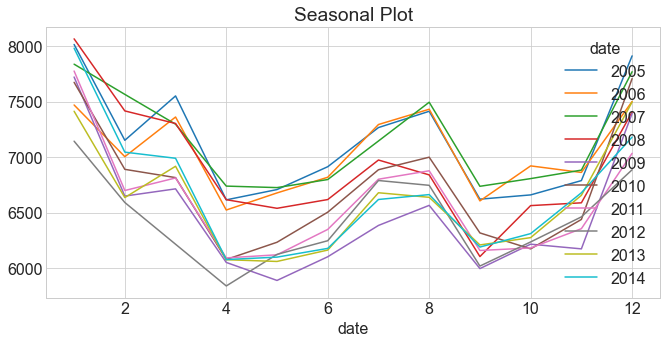

In [35]:
x.groupby([x.index.year, x.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='date'>

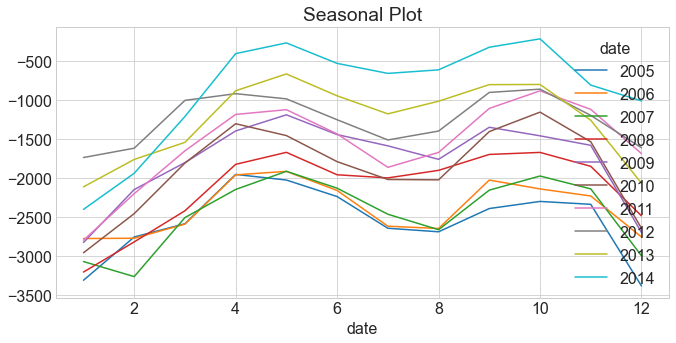

In [36]:
z.groupby([z.index.year, z.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


Seasonal Subseries Plot

In [37]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2005,4703.669,4395.181,4964.711,4661.086,4681.531,4675.718,4622.076,4723.162,4229.679,4359.133,4451.119,4528.238
2006,4693.698,4231.500,4769.844,4563.702,4762.797,4658.733,4675.808,4784.173,4579.345,4780.906,4631.319,4744.882
2007,4766.295,4300.942,4789.460,4591.832,4811.407,4667.170,4680.978,4831.601,4581.483,4831.938,4743.522,4772.485
2008,4859.584,4596.865,4882.690,4791.350,4867.863,4659.152,4975.041,4937.988,4406.150,4891.401,4738.032,4920.737
2009,4894.487,4501.076,4911.425,4654.185,4699.176,4659.088,4796.858,4804.587,4646.178,4756.574,4592.522,4695.395
2010,4715.521,4432.809,5007.242,4773.540,4776.965,4713.787,4867.467,4975.638,4912.295,5017.727,4903.486,5062.813
2011,4977.779,4498.148,5160.762,4906.942,4996.022,4913.867,4937.955,5205.101,5051.033,5299.419,5235.448,5347.022
2012,5406.117,4973.297,5210.409,4920.568,5138.455,4993.742,5277.061,5347.760,5115.653,5375.175,5264.508,5273.614
2013,5299.796,4873.599,5374.647,5194.428,5394.368,5216.612,5501.372,5622.438,5406.165,5473.866,5396.652,5430.146


In [38]:
for month_number, subset in table.iteritems():
    print(month_number)

1
2
3
4
5
6
7
8
9
10
11
12


In [39]:
for number, letter in zip([1, 2, 3], ['a', 'b', 'c']):
    print(number, letter)

1 a
2 b
3 c


In [40]:
ax.get_xlim()

(420.0, 539.0)

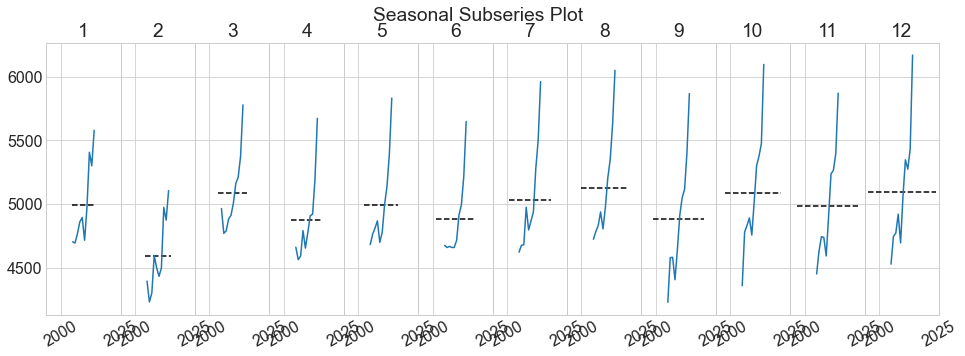

In [41]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16, 5))

for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
# fig.tight_layout()
fig.subplots_adjust(wspace=0)

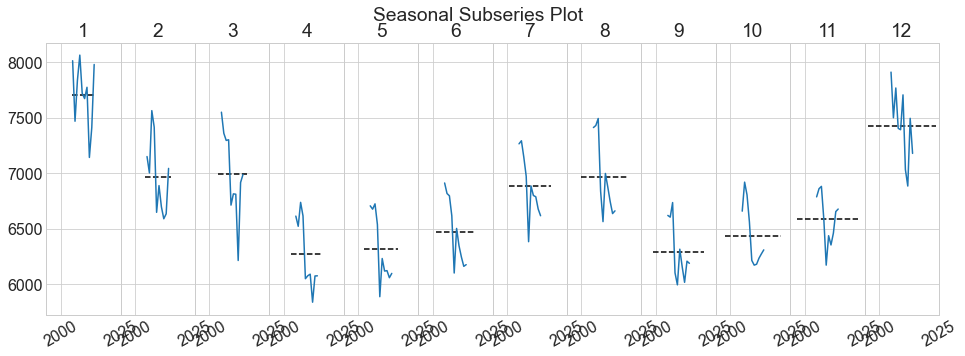

In [42]:
table = x.groupby([x.index.year, x.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16, 5))

for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
# fig.tight_layout()
fig.subplots_adjust(wspace=0)

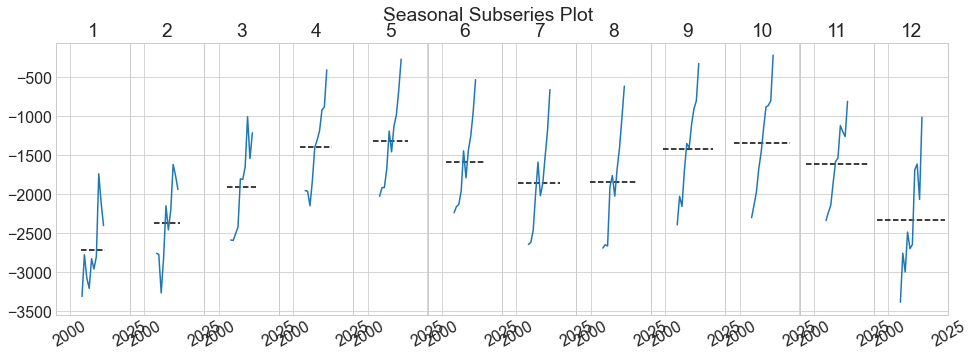

In [43]:
table = z.groupby([z.index.year, z.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16, 5))

for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
# fig.tight_layout()
fig.subplots_adjust(wspace=0)

Lag Plot

In [44]:
df.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1973-01-01,4932.632,6747.651,-1815.019
1973-02-01,4729.582,6163.095,-1433.513
1973-03-01,4946.902,6044.647,-1097.745
1973-04-01,4716.271,5493.184,-776.913
1973-05-01,4956.995,5613.551,-656.556


In [45]:
train['y(t + 1)'] = train.total_fossil_fuels_production_monthly	.shift(-1)
train.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference,month,y(t + 1)
date,,,,,
2005-01-01,4703.669,8015.701,-3312.032,January,4395.181
2005-02-01,4395.181,7152.356,-2757.175,February,4964.711
2005-03-01,4964.711,7551.950,-2587.239,March,4661.086
2005-04-01,4661.086,6615.682,-1954.596,April,4681.531
2005-05-01,4681.531,6708.309,-2026.778,May,4675.718


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

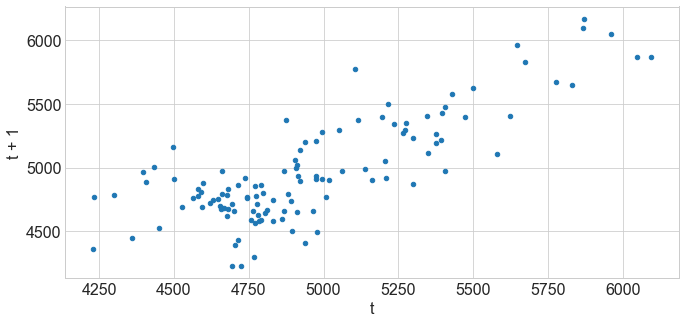

In [46]:
ax = train.plot.scatter(x='total_fossil_fuels_production_monthly', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

,this_month,total_fossil_fuels_consumption_monthly,fossil_fuels_difference,the_next_month
date,,,,
2005-01-31,4703.669,8015.701,-3312.032,4395.181
2005-02-28,4395.181,7152.356,-2757.175,4964.711
2005-03-31,4964.711,7551.950,-2587.239,4661.086
2005-04-30,4661.086,6615.682,-1954.596,4681.531
2005-05-31,4681.531,6708.309,-2026.778,4675.718
...,...,...,...,...
2014-08-31,6049.073,6662.978,-613.905,5866.570
2014-09-30,5866.570,6190.374,-323.804,6095.125
2014-10-31,6095.125,6311.486,-216.361,5870.080


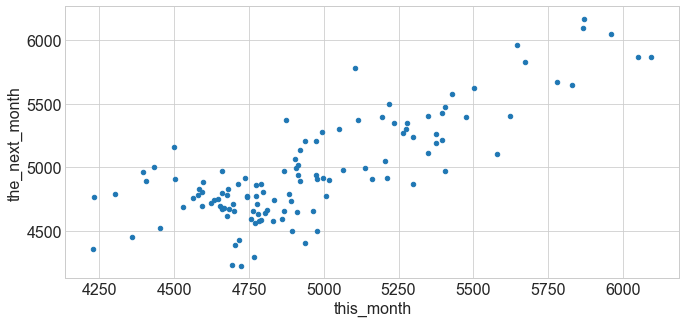

In [47]:
monthly = train.resample('M').mean().drop(columns='y(t + 1)')
monthly['the_next_month'] = monthly.total_fossil_fuels_production_monthly.shift(-1)
monthly = monthly.rename(columns={'total_fossil_fuels_production_monthly': 'this_month'})
monthly.plot.scatter(x='this_month', y='the_next_month')
monthly

<AxesSubplot:xlabel='this_month', ylabel='6_months_out'>

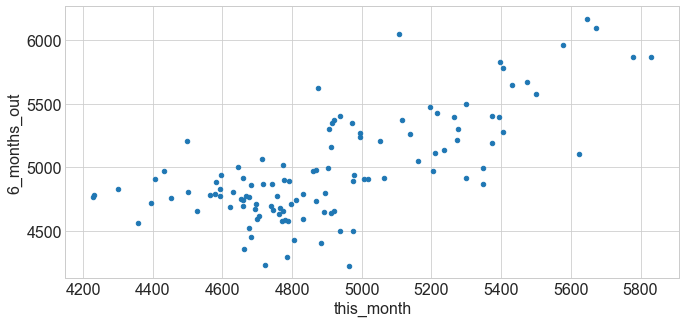

In [48]:
monthly = train.resample('M').mean().drop(columns='y(t + 1)')
monthly['6_months_out'] = monthly.total_fossil_fuels_production_monthly.shift(-6)
monthly = monthly.rename(columns={'total_fossil_fuels_production_monthly': 'this_month'})
monthly.plot.scatter(x='this_month', y='6_months_out')

<AxesSubplot:xlabel='this_month', ylabel='12_months_out'>

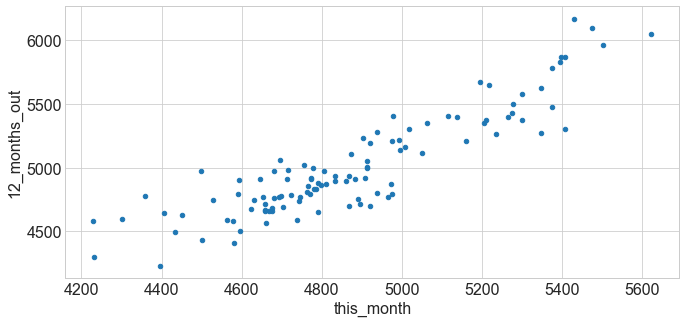

In [49]:
monthly = train.resample('M').mean().drop(columns='y(t + 1)')
monthly['12_months_out'] = monthly.total_fossil_fuels_production_monthly.shift(-12)
monthly = monthly.rename(columns={'total_fossil_fuels_production_monthly': 'this_month'})
monthly.plot.scatter(x='this_month', y='12_months_out')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 60)'>

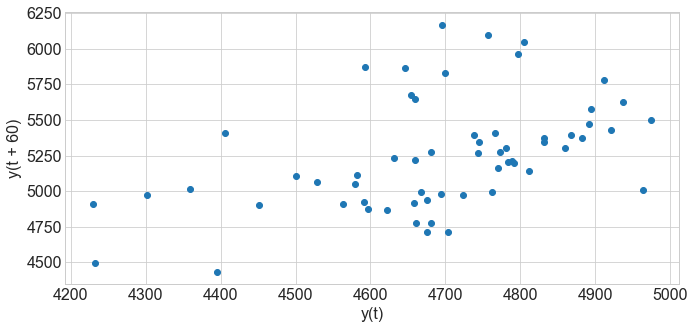

In [50]:
pd.plotting.lag_plot(train.total_fossil_fuels_production_monthly.resample('M').mean(), lag=60)

Autocorrelation Plot

What is pearson's r as a function of the lag time?

autocorrelation: a series correlation with itself
can help to identify seasonality

In [51]:
from scipy import stats

In [52]:
monthly

,this_month,total_fossil_fuels_consumption_monthly,fossil_fuels_difference,12_months_out
date,,,,
2005-01-31,4703.669,8015.701,-3312.032,4693.698
2005-02-28,4395.181,7152.356,-2757.175,4231.500
2005-03-31,4964.711,7551.950,-2587.239,4769.844
2005-04-30,4661.086,6615.682,-1954.596,4563.702
2005-05-31,4681.531,6708.309,-2026.778,4762.797
...,...,...,...,...
2014-08-31,6049.073,6662.978,-613.905,NaN
2014-09-30,5866.570,6190.374,-323.804,NaN
2014-10-31,6095.125,6311.486,-216.361,NaN


In [53]:
lag = 1
monthly.total_fossil_fuels_consumption_monthly.iloc[:-lag].shape, monthly.total_fossil_fuels_consumption_monthly.shift(-lag).dropna().shape

((119,), (119,))

In [54]:
monthly = train.resample('M').mean()
s = pd.Series({
    lag: stats.pearsonr(
        monthly.total_fossil_fuels_consumption_monthly.iloc[:-lag], monthly.total_fossil_fuels_consumption_monthly.shift(-lag).dropna()
    )[0]
    for lag in range(1, 12*3 + 1)
})

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

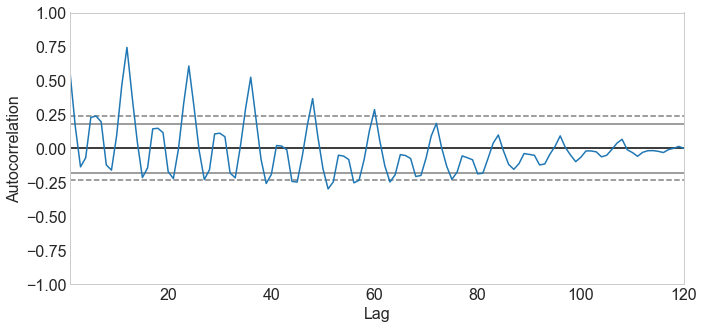

In [55]:
pd.plotting.autocorrelation_plot(train.total_fossil_fuels_consumption_monthly.resample('M').mean())

Seasonal Decomposition

<AxesSubplot:xlabel='date'>

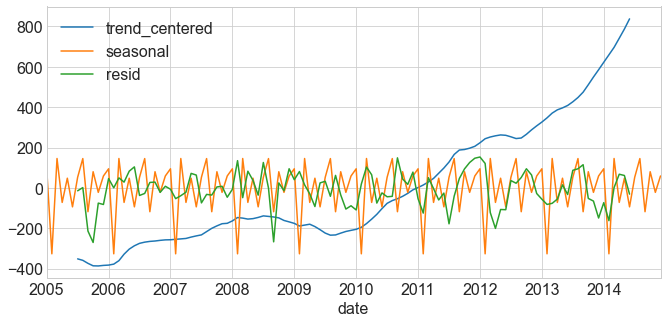

In [56]:
y = train.total_fossil_fuels_production_monthly.resample('M').mean()

result_p = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result_p.observed,
    'trend': result_p.trend,
    'seasonal': result_p.seasonal,
    'resid': result_p.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot()

<AxesSubplot:xlabel='date'>

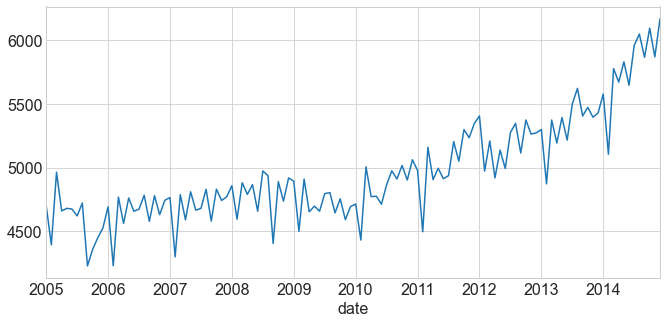

In [57]:
decomposition.y.plot()

<AxesSubplot:xlabel='date'>

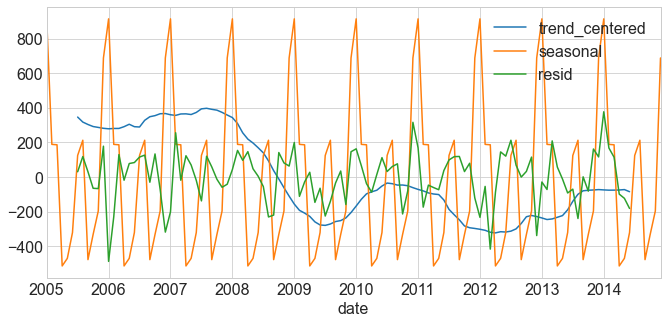

In [58]:
x = train.total_fossil_fuels_consumption_monthly.resample('M').mean()

result_c = sm.tsa.seasonal_decompose(x)
decomposition = pd.DataFrame({
    'x': result_c.observed,
    'trend': result_c.trend,
    'seasonal': result_c.seasonal,
    'resid': result_c.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot()

<AxesSubplot:xlabel='date'>

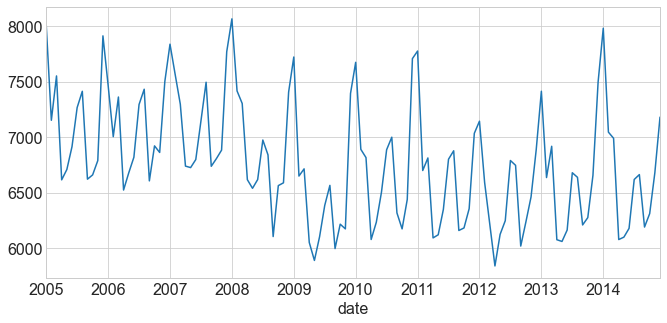

In [59]:
decomposition.x.plot()

<AxesSubplot:xlabel='date'>

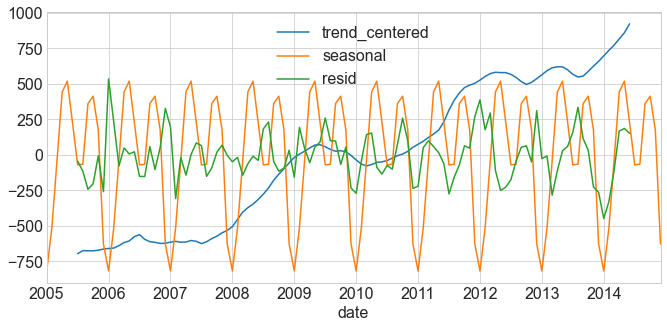

In [60]:
z = train.fossil_fuels_difference.resample('M').mean()

result_d = sm.tsa.seasonal_decompose(z)
decomposition = pd.DataFrame({
    'z': result_d.observed,
    'trend': result_d.trend,
    'seasonal': result_d.seasonal,
    'resid': result_d.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot()

<AxesSubplot:xlabel='date'>

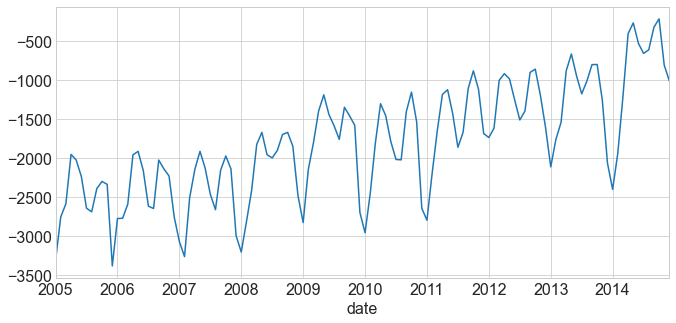

In [61]:
decomposition.z.plot()

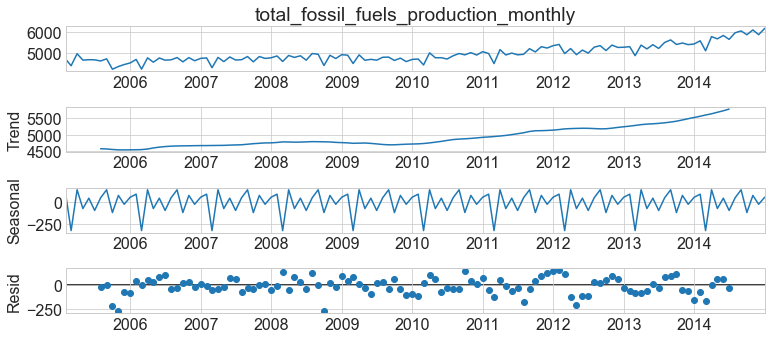

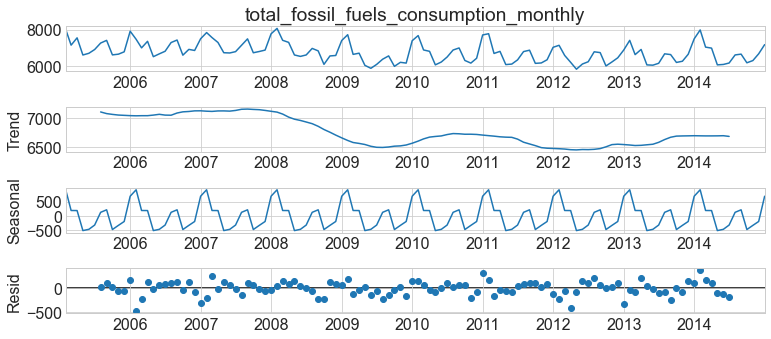

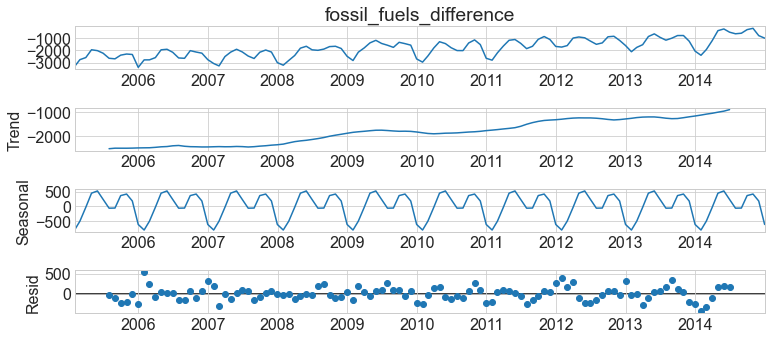

In [62]:
result_p.plot()
None
result_c.plot()
None
result_d.plot()
None

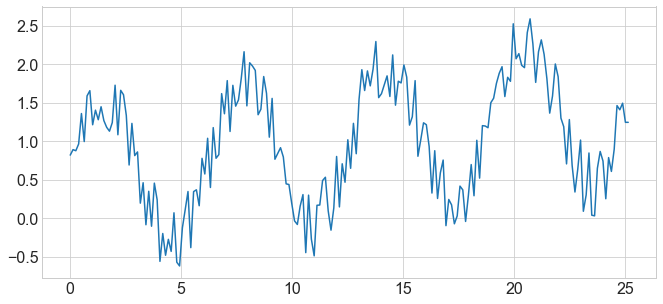

In [63]:
# Simulation Demo
import numpy as np

x = np.linspace(0, 8 * np.pi, 200)
seasonal = np.sin(x)
trend = np.linspace(0, 1, 200)
resid = np.random.rand(200)

y = seasonal + trend + resid

plt.plot(x, y)